---
title: "Supervised Learning"
format:
    html: 
        code-fold: false
---

<!-- After digesting the instructions, you can delete this cell, these are assignment instructions and do not need to be included in your final submission.  -->

<!-- {{< include instructions.qmd >}}  -->

# Introduction and Motivation:

In this analysis, we aim to predict video view counts and classify video popularity using supervised learning models. Our predictions and classifications are based on five key features highly correlated with viewership: "like count," "duration," "definition," "topic categories," and "popularity."

The report is divided into four sections: regression, binary classification, multi-class classification and the key importance features

In the regression section, we employ supervised learning models to predict view counts. Model performance is evaluated using metrics such as RMSE, MAE, and R². Additionally, we visualize the predicted view counts against the actual view counts to assess the models' predictive accuracy and reliability.

In the binary classification section, we utilize supervised learning models to classify videos as "high" or "low" popularity based on their view counts. Videos with over 6 million views are categorized as "high popularity," while those below 6 million are considered "low popularity." Metrics such as accuracy, precision, recall, F1 score, and ROC AUC are used to evaluate the models' performance.

In the multi-class classification section, supervised learning models are applied to classify videos into "high," "medium," or "low" popularity categories. Videos with over 6 million views are classified as "high popularity," those with view counts between 1 million and 6 million as "medium popularity," and those with fewer than 1 million views as "low popularity." The models are assessed using metrics such as macro and weighted precision, recall, F1 score, log loss, and Cohen Kappa score to evaluate their ability to effectively handle multi-class classification tasks.

In the final section, we identify the most important features influencing video popularity. Using the best-performing model, we analyze and visualize feature importance, providing insights into the factors that most significantly impact viewership and popularity.



# Overview of Methods [@gpt4o]

---

## Regression Section

### Random Forest Regressor

1. **What it is**:  
   Random Forest is an ensemble learning method that combines multiple decision trees to improve predictive accuracy and control overfitting.

2. **How it works**:  
   Each tree is trained on a random subset of data and features. The final prediction is the average of predictions from all trees.

3. **Inputs**:  
   Features include both numerical and categorical variables:
   - `likeCount`: Numeric (e.g., 12,000).  
   - `duration`: Numeric (e.g., 300 seconds).  
   - `definition`: Categorical, binary encoded (`1` for `hd`, `0` for `sd`).  
   - `topicCategories`: Categorical, one-hot encoded or frequency counts.  
   - `popularity`: Categorical, binary encoded (`1` for `high`, `0` for `low`).  

4. **Outputs**:  
   Continuous numerical predictions representing estimated view counts.  
   **Example**: For the above inputs, the model might predict 1,200,000 views.

5. **Key Hyperparameters**:  
   - `n_estimators`: Number of trees.  
   - `max_depth`: Maximum depth of trees.  
   - `min_samples_split`: Minimum samples required to split a node.

---

### Linear Regressor

1. **What it is**:  
   A simple, interpretable model predicting continuous outcomes, such as video view counts.

2. **How it works**:  
   Assigns weights to each feature to predict the target variable by minimizing the difference between actual and predicted values.

3. **Inputs**:  
   - `likeCount`: Numeric (e.g., 12,000).  
   - `duration`: Numeric (e.g., 300 seconds).  
   - `definition`: Categorical, binary encoded (`1` for `hd`, `0` for `sd`).  
   - `topicCategories`: Categorical, one-hot encoded or frequency counts.  
   - `popularity`: Categorical, binary encoded (`1` for `high`, `0` for `low`).  

4. **Outputs**:  
   Continuous numerical predictions of view counts.  
   **Example**: For the above inputs, the model might predict 1,200,000 views.

5. **Key Hyperparameters**:  
   - `alpha`: Regularization strength.  
   - `solver`: Optimization method.  
   - `max_iter`: Maximum number of iterations.

---

### Gradient Boosting Regressor

1. **What it is**:  
   Gradient Boosting is an ensemble method that builds a series of models sequentially, correcting errors from previous models.

2. **How it works**:  
   Sequentially adds decision trees trained on residual errors. The final prediction is the weighted sum of tree predictions.

3. **Inputs**:  
   - `likeCount`: Numeric (e.g., 12,000).  
   - `duration`: Numeric (e.g., 300 seconds).  
   - `definition`: Categorical, binary encoded (`1` for `hd`, `0` for `sd`).  
   - `topicCategories`: Categorical, one-hot encoded or frequency counts.  
   - `popularity`: Categorical, binary encoded (`1` for `high`, `0` for `low`).  

4. **Outputs**:  
   Predicted view counts.  
   **Example**: For the above inputs, the model might predict 1,200,000 views.

5. **Key Hyperparameters**:  
   - `n_estimators`: Number of trees.  
   - `max_depth`: Tree depth.  
   - `learning_rate`: Contribution of each tree.  
   - `subsample`: Fraction of data used for each tree.

---

## Binary Classification Section

### Random Forest Classifier

1. **What it is**:  
   An ensemble learning method for classification tasks that aggregates predictions from multiple decision trees.

2. **How it works**:  
   Each tree votes for a class, and the majority vote determines the final output.

3. **Inputs**:  
   - `likeCount`: Numeric (e.g., 12,000).  
   - `duration`: Numeric (e.g., 300 seconds).  
   - `definition`: Binary encoded (`1` for `hd`, `0` for `sd`).  
   - `topicCategories`: One-hot encoded or frequency counts.  

4. **Outputs**:  
   Binary class labels (`0` for low, `1` for high popularity).

5. **Key Hyperparameters**:  
   - `n_estimators`: Number of trees.  
   - `max_depth`: Tree depth.  
   - `min_samples_split`: Minimum samples required to split a node.  

---

### Logistic Regression

1. **What it is**:  
   A statistical method for binary classification tasks.

2. **How it works**:  
   Estimates probabilities using a logistic function and classifies based on a threshold (default: 0.5).

3. **Inputs**:  
   - `likeCount`: Numeric (e.g., 12,000).  
   - `duration`: Numeric (e.g., 300 seconds).  
   - `definition`: Binary encoded (`1` for `hd`, `0` for `sd`).  
   - `topicCategories`: One-hot encoded.  

4. **Outputs**:  
   - **Class Labels**: `0` or `1`.  
   - **Class Probabilities**: Probabilities for each class.  
   **Example**: For the above inputs, the model might predict `1` with a probability of 0.85.

5. **Key Hyperparameters**:  
   - `penalty`: Regularization type (`l1`, `l2`, etc.).  
   - `C`: Inverse of regularization strength.  
   - `max_iter`: Maximum iterations.  

---

### Gradient Boosting Classifier

1. **What it is**:  
   An ensemble method combining decision trees to classify multi-class problems effectively.

2. **How it works**:  
   Sequentially trains trees to minimize classification error, with predictions as weighted averages.

3. **Inputs**:  
   - `likeCount`: Numeric.  
   - `duration`: Numeric.  
   - `definition`: Binary encoded.  
   - `topicCategories`: One-hot encoded.  

4. **Outputs**:  
   - **Class Labels**: Predicted categories.  
   - **Class Probabilities**: Probabilities for each class.

5. **Key Hyperparameters**:  
   - `n_estimators`: Number of trees.  
   - `learning_rate`: Step size for boosting iterations.  
   - `subsample`: Fraction of data used per tree.

---

## Multi-Class Classification Section

### Gradient Boosting Classifier

1. **What it is**:  
   An ensemble method combining decision trees to classify multi-class problems effectively.

2. **How it works**:  
   Sequentially trains trees to minimize classification error, with predictions as weighted averages.

3. **Inputs**:  
   - `likeCount`: Numeric.  
   - `duration`: Numeric.  
   - `definition`: Binary encoded.  
   - `topicCategories`: One-hot encoded.  

4. **Outputs**:  
   - **Class Labels**: Predicted categories(multi-class popularity label).  
   - **Class Probabilities**: Probabilities for each class.

5. **Key Hyperparameters**:  
   - `n_estimators`: Number of trees.  
   - `learning_rate`: Step size for boosting iterations.  
   - `subsample`: Fraction of data used per tree.

---

### K-Nearest Neighbors (KNN)

1. **What it is**:  
   A non-parametric method that classifies data points based on the majority vote of their `k` nearest neighbors.

2. **How it works**:  
   Calculates distances to all training points, identifies the nearest `k`, and predicts the majority class.

3. **Inputs**:  
   - `likeCount`, `duration`, `definition`, and `topicCategories`, scaled for distance calculations.

4. **Outputs**:  
   - **Class Labels**: Predicted categories.  
   - **Class Probabilities**: Proportions of nearest neighbors for each class.

5. **Key Hyperparameters**:  
   - `n_neighbors`: Number of neighbors.  
   - `weights`: Voting method.  
   - `metric`: Distance metric (`euclidean`, `manhattan`, etc.).  

---

### Decision Tree Classifier 

1. **What it is**:
   A supervised machine learning algorithm used for classification and regression tasks. It splits the dataset into smaller subsets based on feature values, forming a tree-like structure where each node represents a decision rule and each leaf node represents an outcome.

2. **How it works**: 
   The dataset is split into branches based on feature values, applying criteria like Gini Impurity, Entropy, or Log Loss, until a stopping criterion is met, and predictions are made by traversing the tree to a leaf node that provides the final class or value.

3. **Inputs**:   
   - `likeCount`, `duration`, `definition`, and `topicCategories`, scaled for distance calculations.

4. **Outputs**:  
   - **Class Labels:** Predicted categories for `popularity_multi_class`.  
   - **Class Probabilities:** The probabilities for each class, calculated from the proportion of samples in a leaf node.

5. **Key Hyperparameters**:  
   - **Criterion:** The function to measure the quality of a split (e.g., Gini Impurity, Entropy, or Log Loss).  
   - **Max Depth:** Maximum depth of the tree to prevent overfitting.  
   - **Min Samples Split:** Minimum number of samples required to split an internal node.  
   - **Min Samples Leaf:** Minimum number of samples required to be at a leaf node.  
   - **Max Features:** The number of features to consider when looking for the best split.





# Code 

Provide the source code used for this section of the project here.

If you're using a package for code organization, you can import it at this point. However, make sure that the **actual workflow steps**—including data processing, analysis, and other key tasks—are conducted and clearly demonstrated on this page. The goal is to show the technical flow of your project, highlighting how the code is executed to achieve your results.

If relevant, link to additional documentation or external references that explain any complex components. This section should give readers a clear view of how the project is implemented from a technical perspective.

Remember, this page is a technical narrative, NOT just a notebook with a collection of code cells, include in-line Prose, to describe what is going on.

In [74]:
import pandas as pd
data = pd.read_csv("../../data/processed-data/cleaned_data.csv")

# Regression section

## Random Forest Regressor

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 445}
Regression Metrics:
RMSE: 0.24950307870026947
MAE: 0.10995794979659819
R-squared: 0.7712702907389977


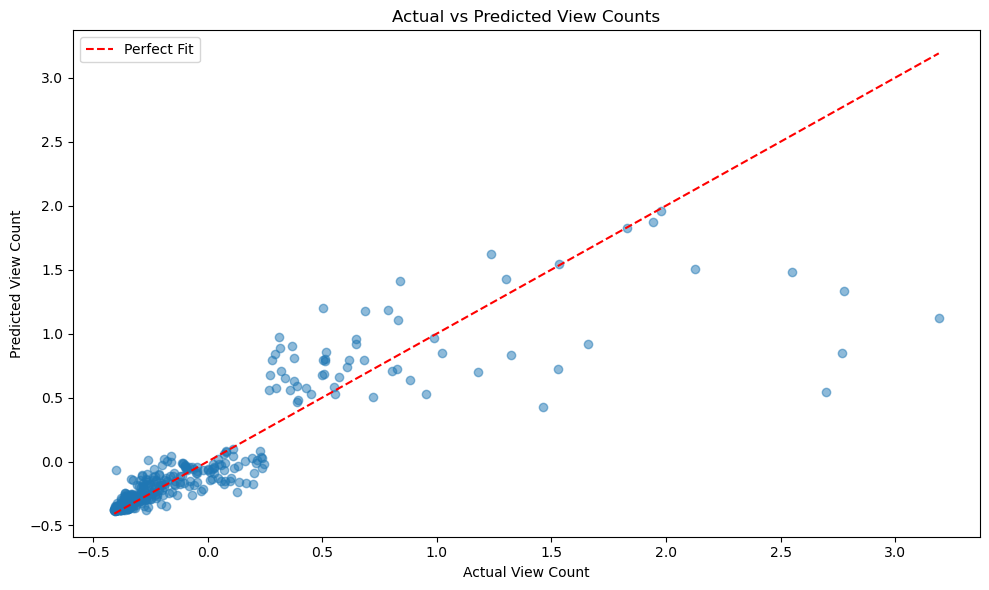

In [51]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy.stats import randint
import matplotlib.pyplot as plt

# Load and preprocess data
features = ["likeCount", "duration", "definition", "topicCategories","popularity"]
X = data[features]
y = data["viewCount"]

# Remove outliers using percentile
lower_bound = y.quantile(0.01)
upper_bound = y.quantile(0.99)
data = data[(y >= lower_bound) & (y <= upper_bound)]

X = data[features]
y = data["viewCount"]

# Feature engineering
X.loc[:, "topicCategories"] = X["topicCategories"].map(X["topicCategories"].value_counts())
X.loc[:, "definition"] = (X["definition"] == "hd").astype(int)
X.loc[:, "popularity"] = (X["popularity"] == "high").astype(int)
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest hyperparameter search
param_dist = {
    'n_estimators': randint(100, 500),  # Increase range for the number of trees
    'max_depth': [10, 20, 30, None],   # Add 'None' for unlimited depth
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],  # Add 'None' to consider all features
    'bootstrap': [True, False],  # Use bootstrap sampling
}

clf = RandomForestRegressor(random_state=42)
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=100,  # Increase iterations for better parameter search
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    random_state=42,
    verbose=0  # Show progress
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", random_search.best_params_)

# Train the best model
best_clf = random_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predict
y_pred = best_clf.predict(X_test)

# Evaluate regression performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual View Count")
plt.ylabel("Predicted View Count")
plt.title("Actual vs Predicted View Counts")
plt.legend()
plt.tight_layout()
plt.show()



## Linear Regressor


Best Parameters: {'alpha': 10, 'solver': 'auto'}
Regression Metrics:
RMSE: 0.2056597055110518
MAE: 0.12407352920784746
R-squared: 0.8032625833891794


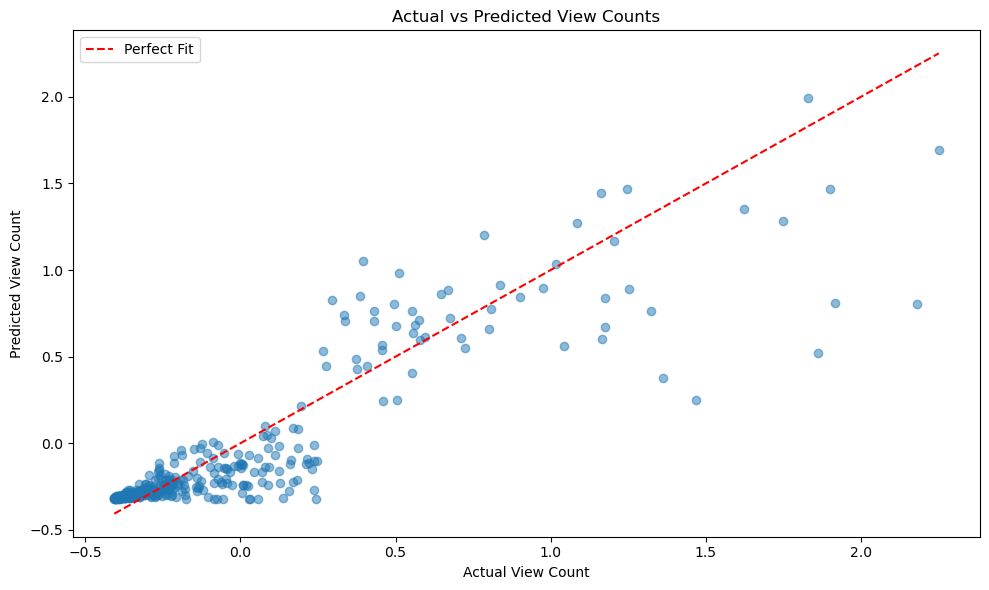

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load and preprocess data
features = ["likeCount", "duration", "definition", "topicCategories","popularity"]
X = data[features]
y = data["viewCount"]

# Remove outliers using percentile
lower_bound = y.quantile(0.01)
upper_bound = y.quantile(0.99)
data = data[(y >= lower_bound) & (y <= upper_bound)]

X = data[features]
y = data["viewCount"]

# Handle missing values
X = X.fillna(0)

# Feature engineering
X.loc[:, "topicCategories"] = X["topicCategories"].map(X["topicCategories"].value_counts())
X.loc[:, "definition"] = (X["definition"] == "hd").astype(int)
X.loc[:, "popularity"] = (X["popularity"] == "high").astype(int)
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Ridge Regression
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']  # Avoid sag and saga for stability
}

ridge = Ridge(max_iter=5000)  # Increase max_iter for convergence
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_regressor = grid_search.best_estimator_
best_regressor.fit(X_train, y_train)

# Predict
y_pred = best_regressor.predict(X_test)

# Evaluate regression performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual View Count")
plt.ylabel("Predicted View Count")
plt.title("Actual vs Predicted View Counts")
plt.legend()
plt.tight_layout()
plt.show()




## Gradient Boosting Regressor

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}
Regression Metrics:
RMSE: 0.12945966218516167
MAE: 0.07980190234589664
R-squared: 0.8727429441887932


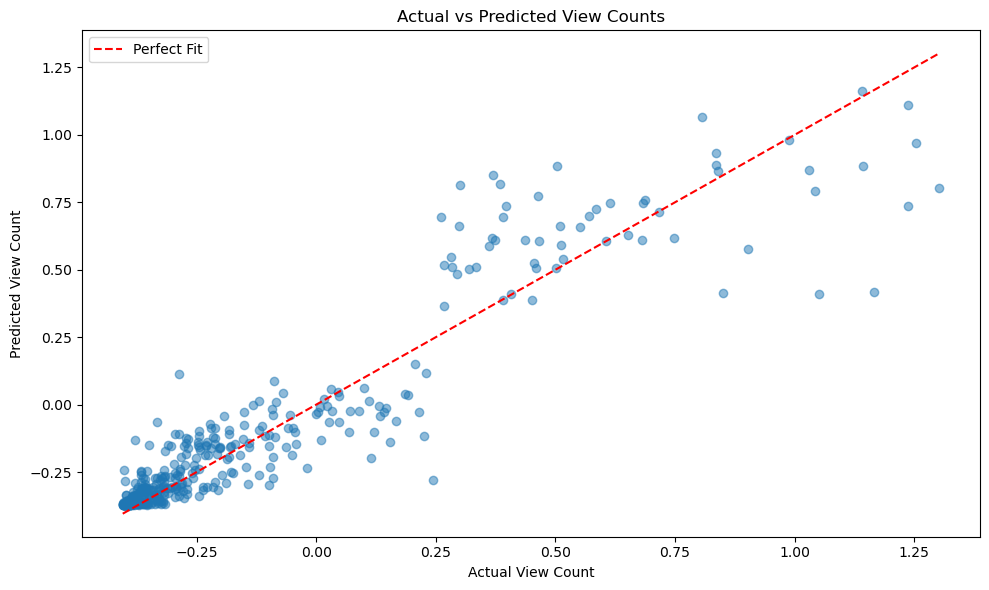

In [60]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

# Load and preprocess data
features = ["likeCount", "duration", "definition", "topicCategories","popularity"]
X = data[features]
y = data["viewCount"]

# Remove outliers using percentile
lower_bound = y.quantile(0.01)
upper_bound = y.quantile(0.99)
data = data[(y >= lower_bound) & (y <= upper_bound)]

X = data[features]
y = data["viewCount"]
# Handle missing values and ensure proper data types
X = X.fillna(0)

# Feature engineering
X.loc[:, "topicCategories"] = X["topicCategories"].map(X["topicCategories"].value_counts()).fillna(0).astype(int)
X.loc[:, "definition"] = (X["definition"] == "hd").astype(int)

X["popularity"] = X["popularity"].fillna("low")  # Fill missing values
X["popularity"] = (X["popularity"] == "high").astype(int)  # Convert to binary

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Boosting hyperparameter search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0],  # Fraction of samples used for fitting the individual base learners
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider for best split
}

gbr = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=0
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train the best model
best_gbr = grid_search.best_estimator_
best_gbr.fit(X_train, y_train)

# Predict
y_pred = best_gbr.predict(X_test)

# Evaluate regression performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Regression Metrics:")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared: {r2}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         color='red', linestyle='--', label="Perfect Fit")
plt.xlabel("Actual View Count")
plt.ylabel("Predicted View Count")
plt.title("Actual vs Predicted View Counts")
plt.legend()
plt.tight_layout()
plt.show()


# Binary classification 

## Random Forest classifier



Fitting 3 folds for each of 1296 candidates, totalling 3888 fits
Best Parameters: {'bootstrap': True, 'class_weight': None, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Random Forest Classifier - Binary Classification Metrics:
Accuracy: 0.9496530060632625
Precision: 0.9626261725812437
Recall: 0.9800851783786938
F1 Score: 0.9712351897838586
ROC AUC: 0.9642452763319597


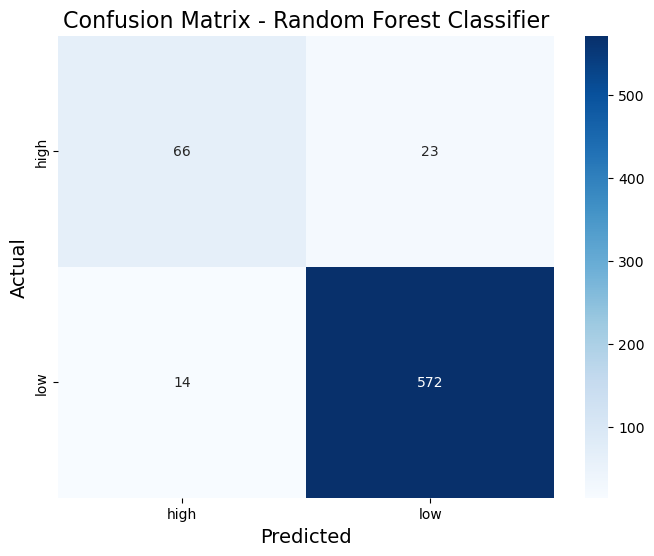

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target variable
features = ["likeCount", "duration", "definition", "topicCategories"]
X = data[features]  # Feature matrix
X = X.fillna(0)  # Replace NaN values with 0

y = data["popularity"]  # Target variable (labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure categorical features are encoded properly
X = pd.get_dummies(X, columns=["definition", "topicCategories"], drop_first=True)

# Feature scaling (not strictly necessary for Random Forest)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter search space for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],        # Number of trees
    'max_depth': [None, 10, 20, 30],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],       # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples at a leaf node
    'max_features': ['sqrt', 'log2', None],# Features to consider for the best split
    'class_weight': [None, 'balanced'],    # Class weights for imbalance
    'bootstrap': [True, False]             # Whether to use bootstrapping
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Perform the grid search
grid_search.fit(X_scaled, y)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the best model on the entire dataset
best_rf = grid_search.best_estimator_

# Initialize metric storage for cross-validation evaluation
accuracies, precisions, recalls, f1_scores, roc_aucs = [], [], [], [], []

# Cross-validation evaluation with best parameters
for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = np.array(y)[train_idx], np.array(y)[test_idx]
    
    best_rf.fit(X_train, y_train)  # Train the best model
    y_pred = best_rf.predict(X_test)  # Predict on test data
    y_proba = best_rf.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class
    
    # Evaluate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    if len(np.unique(y_test)) > 1:  # Check if both classes exist
        roc_aucs.append(roc_auc_score(y_test, y_proba))
    else:
        roc_aucs.append(float("nan"))

# Print evaluation metrics
print("\nRandom Forest Classifier - Binary Classification Metrics:")
print("Accuracy:", np.mean(accuracies))
print("Precision:", np.mean(precisions))
print("Recall:", np.mean(recalls))
print("F1 Score:", np.mean(f1_scores))
print("ROC AUC:", np.nanmean(roc_aucs))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with more readable labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Add titles and labels
plt.title("Confusion Matrix - Random Forest Classifier", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

# Show the plot
plt.show()




## Logistic Regression


Best Parameters: {'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.9422550629447182
Precision: 0.9531104160219265
Recall: 0.9817906630406631
F1_score: 0.9672090134595874
Roc_auc: 0.962362779409425


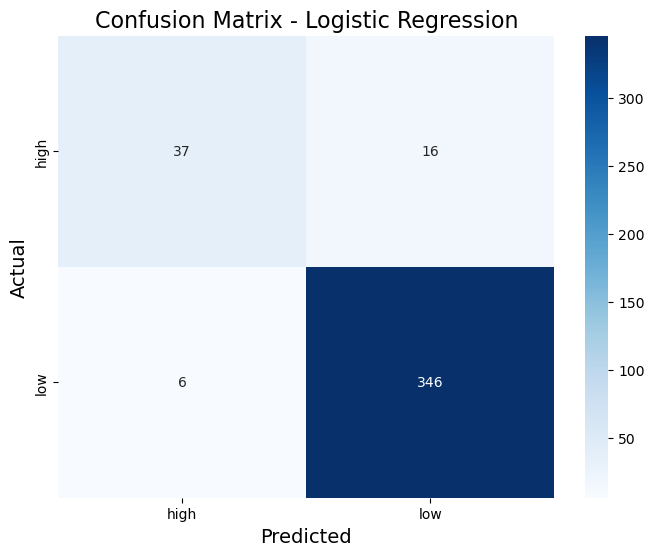

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

X = data[["likeCount", "duration", "definition", "topicCategories"]].copy()


X["likeCount"] = X["likeCount"].fillna(X["likeCount"].median())
X["duration"] = X["duration"].fillna(X["duration"].median())
X = X.fillna("missing")  
y = data["popularity"]

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X = pd.get_dummies(X, columns=["definition", "topicCategories"], drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


param_grid = [
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['lbfgs'], 'max_iter': [5000]},
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear'], 'max_iter': [5000]},
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10, 100], 'solver': ['saga'], 'l1_ratio': [0.1, 0.5, 0.9], 'max_iter': [5000]}
]


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


clf = LogisticRegression(random_state=42)


grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=0
)


grid_search.fit(X_scaled, y)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_lr = grid_search.best_estimator_
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1_score': [], 'roc_auc': []}

for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    best_lr.fit(X_train, y_train)
    y_pred = best_lr.predict(X_test)
    y_proba = best_lr.predict_proba(X_test)[:, 1]
    
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, zero_division=0))
    metrics['recall'].append(recall_score(y_test, y_pred, zero_division=0))
    metrics['f1_score'].append(f1_score(y_test, y_pred, zero_division=0))
    metrics['roc_auc'].append(roc_auc_score(y_test, y_proba))


for metric, scores in metrics.items():
    print(f"{metric.capitalize()}: {np.mean(scores)}")


conf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Logistic Regression", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()







## Gradient Boosting Classifier

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}

Gradient Boosting Classifier - Binary Classification
Accuracy: 0.9516316973788237
Precision: 0.9642341340048605
Recall: 0.9806494431494432
F1 Score: 0.9723572674490519
ROC AUC: 0.9695507727270917


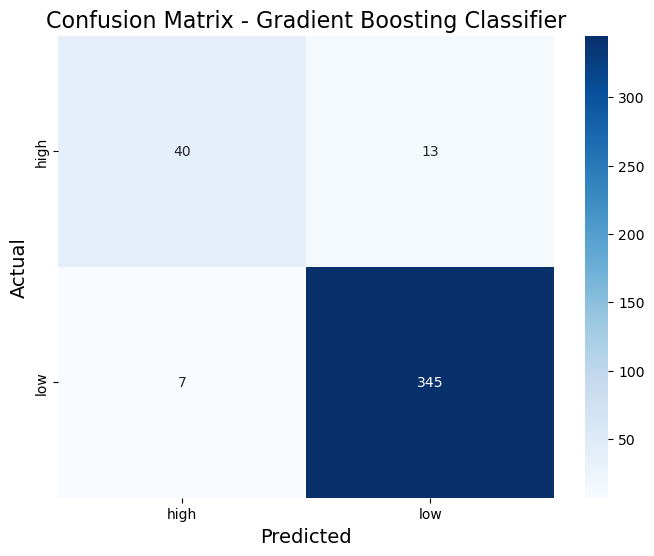

In [65]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target variable
features = ["likeCount", "duration", "definition", "topicCategories"]
X = data[features]  # Feature matrix
X = X.fillna(0)  # Replace NaN values with 0

y = data["popularity"]  # Target variable (binary labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure categorical features are encoded properly
X = pd.get_dummies(X, columns=["definition", "topicCategories"], drop_first=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter search space for Gradient Boosting Classifier
param_grid = {
    'n_estimators': [100, 200, 300],         # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],      # Learning rate
    'max_depth': [3, 5, 7],                 # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],          # Minimum samples required at a leaf node
    'subsample': [0.8, 1.0],                # Fraction of samples used for fitting individual trees
    'max_features': ['sqrt', 'log2', None]  # Number of features considered when looking for the best split
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter tuning with GridSearchCV
clf = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Perform the grid search
grid_search.fit(X_scaled, y)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the best model on the entire dataset
best_gbc = grid_search.best_estimator_

# Initialize metric storage for cross-validation evaluation
accuracies, precisions, recalls, f1_scores, roc_aucs = [], [], [], [], []

# Cross-validation evaluation with best parameters
for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    best_gbc.fit(X_train, y_train)  # Train the best model
    y_pred = best_gbc.predict(X_test)  # Predict on test data
    y_proba = best_gbc.predict_proba(X_test)[:, 1]  # Predicted probabilities
    
    # Evaluate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
    roc_aucs.append(roc_auc_score(y_test, y_proba))

# Print evaluation metrics
print("\nGradient Boosting Classifier - Binary Classification")
print("Accuracy:", np.mean(accuracies))
print("Precision:", np.mean(precisions))
print("Recall:", np.mean(recalls))
print("F1 Score:", np.mean(f1_scores))
print("ROC AUC:", np.mean(roc_aucs))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with more readable labels
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Add titles and labels
plt.title("Confusion Matrix - Gradient Boosting Classifier", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

# Show the plot
plt.show()



# Multi-class classification section 

## Gradient Boosting Classifier


Fitting 5 folds for each of 486 candidates, totalling 2430 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200, 'subsample': 0.8}
Gradient Boosting Classifier - Multi-Class Classification
Accuracy: 0.8533
Macro Precision: 0.8516
Macro Recall: 0.8360
Macro F1 Score: 0.8427
Weighted Precision: 0.8526
Weighted Recall: 0.8533
Weighted F1 Score: 0.8521
Log Loss: 0.4071
Cohen Kappa Score: 0.7610


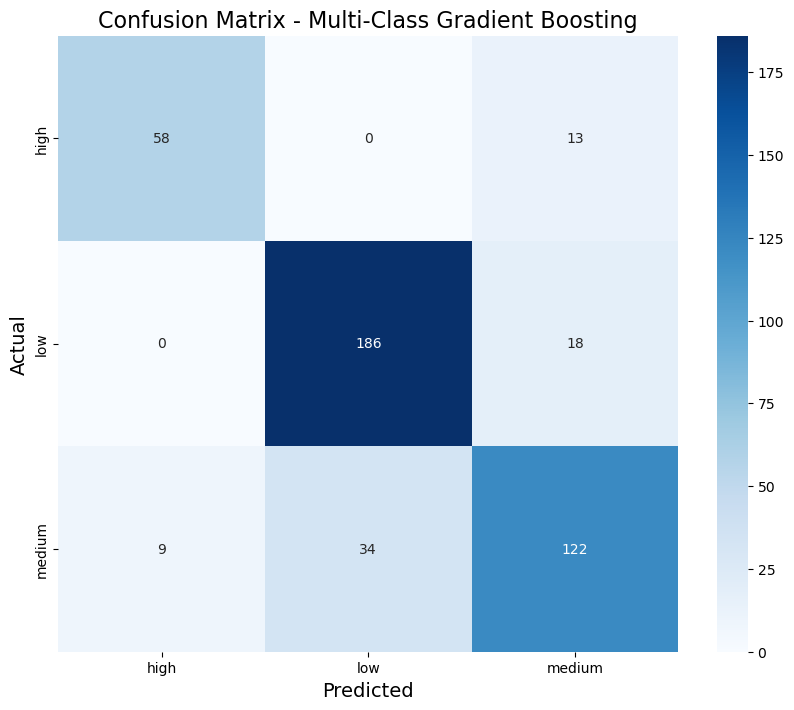


Classification Report:

              precision    recall  f1-score   support

        high       0.87      0.82      0.84        71
         low       0.85      0.91      0.88       204
      medium       0.80      0.74      0.77       165

    accuracy                           0.83       440
   macro avg       0.84      0.82      0.83       440
weighted avg       0.83      0.83      0.83       440



In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, log_loss, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target variable
features = ["likeCount", "duration", "definition", "topicCategories"]
X = data[features].fillna(0)  # Replace NaN values with 0
y = data["popularity_multi_class"]  # Target variable (multi-class labels)

# Label encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure categorical features are encoded properly
X = pd.get_dummies(X, columns=["definition", "topicCategories"], drop_first=True)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0]
}

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize Gradient Boosting Classifier
clf = GradientBoostingClassifier(random_state=42)

# Hyperparameter tuning with GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Perform grid search
grid_search.fit(X_scaled, y)

# Get best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Cross-validation evaluation with best model
accuracies, precisions_macro, recalls_macro, f1_scores_macro = [], [], [], []
precisions_weighted, recalls_weighted, f1_scores_weighted = [], [], []
log_losses, kappa_scores = [], []

for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the best model
    best_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)
    
    # Evaluate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions_macro.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recalls_macro.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    f1_scores_macro.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
    precisions_weighted.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    recalls_weighted.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    f1_scores_weighted.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
    log_losses.append(log_loss(y_test, y_proba))
    kappa_scores.append(cohen_kappa_score(y_test, y_pred))

# Print evaluation metrics
print("Gradient Boosting Classifier - Multi-Class Classification")
print("=========================================================")
print(f"Accuracy: {np.mean(accuracies):.4f}")
print(f"Macro Precision: {np.mean(precisions_macro):.4f}")
print(f"Macro Recall: {np.mean(recalls_macro):.4f}")
print(f"Macro F1 Score: {np.mean(f1_scores_macro):.4f}")
print(f"Weighted Precision: {np.mean(precisions_weighted):.4f}")
print(f"Weighted Recall: {np.mean(recalls_weighted):.4f}")
print(f"Weighted F1 Score: {np.mean(f1_scores_weighted):.4f}")
print(f"Log Loss: {np.mean(log_losses):.4f}")
print(f"Cohen Kappa Score: {np.mean(kappa_scores):.4f}")

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix - Multi-Class Gradient Boosting", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)
plt.show()

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



## Decision Tree Classifier


Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Classifier with Hyperparameter Tuning - Multi-Class Classification
Accuracy: 0.8401339929911359
Macro Precision: 0.833451423276734
Macro Recall: 0.8258330198476095
Macro F1 Score: 0.828370209357443
Weighted Precision: 0.8393017350579939
Weighted Recall: 0.8401339929911359
Weighted F1 Score: 0.8386803790157578
Log Loss: 0.7277971131663302
Cohen Kappa Score: 0.7402908330435282


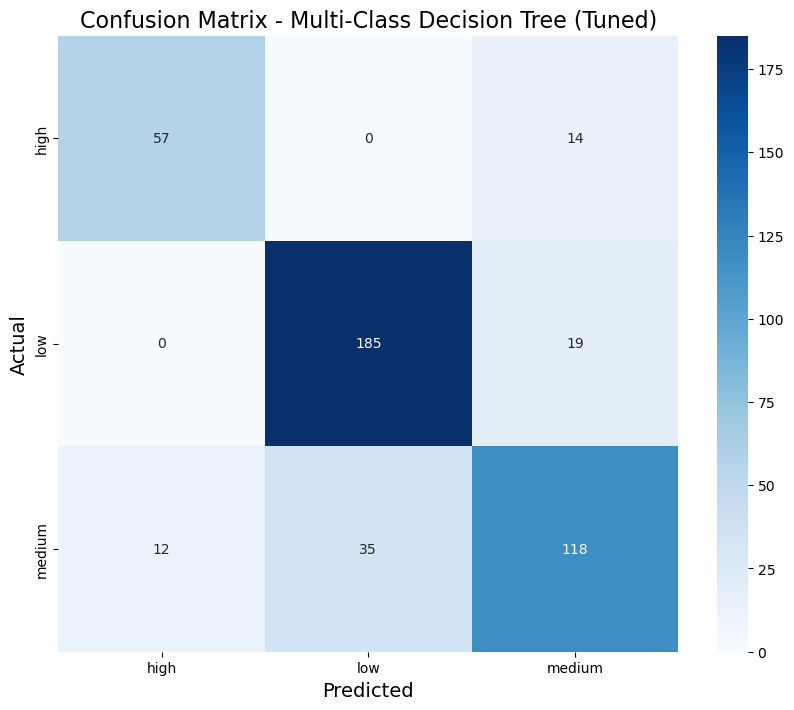


Classification Report:

              precision    recall  f1-score   support

        high       0.83      0.80      0.81        71
         low       0.84      0.91      0.87       204
      medium       0.78      0.72      0.75       165

    accuracy                           0.82       440
   macro avg       0.82      0.81      0.81       440
weighted avg       0.82      0.82      0.82       440



In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, log_loss, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target variable
features = ["likeCount", "duration", "definition", "topicCategories"]
X = data[features]  # Feature matrix
X = X.fillna(0)  # Replace NaN values with 0

y = data["popularity_multi_class"]  # Target variable (multi-class labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure categorical features are encoded properly
X = pd.get_dummies(X, columns=["definition", "topicCategories"], drop_first=True)

# Feature scaling (not strictly needed for Decision Tree but kept for consistency)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid for DecisionTreeClassifier
param_grid = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 5, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [None, "sqrt", "log2"]
}

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_clf = grid_search.best_estimator_

# Initialize metric storage for evaluation
accuracies, precisions_macro, recalls_macro, f1_scores_macro = [], [], [], []
precisions_weighted, recalls_weighted, f1_scores_weighted = [], [], []
log_losses, kappa_scores = [], []

# Cross-validation loop with the best model
for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the best Decision Tree Classifier
    best_clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = best_clf.predict(X_test)
    y_proba = best_clf.predict_proba(X_test)  # Probability estimates for all classes
    
    # Evaluate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions_macro.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recalls_macro.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    f1_scores_macro.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
    
    precisions_weighted.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    recalls_weighted.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    f1_scores_weighted.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
    
    log_losses.append(log_loss(y_test, y_proba))
    kappa_scores.append(cohen_kappa_score(y_test, y_pred))

# Print evaluation metrics
print("Decision Tree Classifier with Hyperparameter Tuning - Multi-Class Classification")
print("===========================================================================")
print(f"Accuracy: {np.mean(accuracies)}")
print(f"Macro Precision: {np.mean(precisions_macro)}")
print(f"Macro Recall: {np.mean(recalls_macro)}")
print(f"Macro F1 Score: {np.mean(f1_scores_macro)}")
print(f"Weighted Precision: {np.mean(precisions_weighted)}")
print(f"Weighted Recall: {np.mean(recalls_weighted)}")
print(f"Weighted F1 Score: {np.mean(f1_scores_weighted)}")
print(f"Log Loss: {np.mean(log_losses)}")
print(f"Cohen Kappa Score: {np.mean(kappa_scores)}")

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Add titles and labels
plt.title("Confusion Matrix - Multi-Class Decision Tree (Tuned)", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

# Show the plot
plt.show()

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


## K-Nearest Neighbors (KNN)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
K-Nearest Neighbors (KNN) with Hyperparameter Tuning - Multi-Class Classification
Accuracy: 0.7724695938981653
Macro Precision: 0.7794176006169204
Macro Recall: 0.7433875665336453
Macro F1 Score: 0.7568255245158504
Weighted Precision: 0.7721904010101952
Weighted Recall: 0.7724695938981653
Weighted F1 Score: 0.7687121833806551
Log Loss: 1.4498988304474825
Cohen Kappa Score: 0.6249967306705042


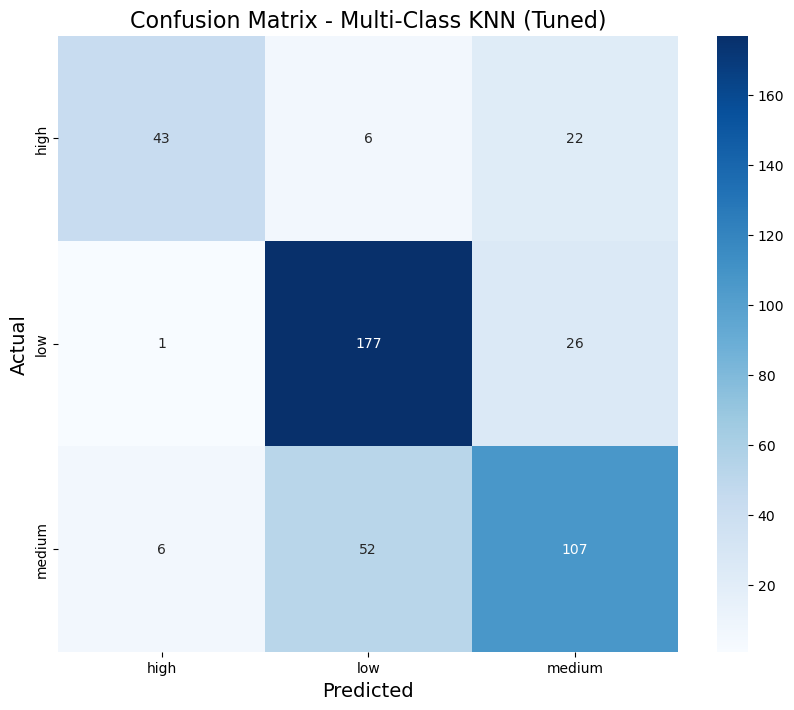


Classification Report:

              precision    recall  f1-score   support

        high       0.86      0.61      0.71        71
         low       0.75      0.87      0.81       204
      medium       0.69      0.65      0.67       165

    accuracy                           0.74       440
   macro avg       0.77      0.71      0.73       440
weighted avg       0.75      0.74      0.74       440



In [78]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, log_loss, cohen_kappa_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Features and target variable
features = ["likeCount", "duration", "definition", "topicCategories"]
X = data[features]  # Feature matrix
X = X.fillna(0)  # Replace NaN values with 0

y = data["popularity_multi_class"]  # Target variable (multi-class labels)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Ensure categorical features are encoded properly
X = pd.get_dummies(X, columns=["definition", "topicCategories"], drop_first=True)

# Feature scaling (important for KNN because it relies on distance metrics)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid for KNN
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weighting scheme
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics
}

# K-Nearest Neighbors Classifier
clf = KNeighborsClassifier()

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_scaled, y)

# Best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_clf = grid_search.best_estimator_

# Initialize metric storage for evaluation
accuracies, precisions_macro, recalls_macro, f1_scores_macro = [], [], [], []
precisions_weighted, recalls_weighted, f1_scores_weighted = [], [], []
log_losses, kappa_scores = [], []

# Cross-validation loop with the best model
for train_idx, test_idx in cv.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the best KNN model
    best_clf.fit(X_train, y_train)
    
    # Predictions
    y_pred = best_clf.predict(X_test)
    y_proba = best_clf.predict_proba(X_test)  # Probability estimates for all classes
    
    # Evaluate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions_macro.append(precision_score(y_test, y_pred, average='macro', zero_division=0))
    recalls_macro.append(recall_score(y_test, y_pred, average='macro', zero_division=0))
    f1_scores_macro.append(f1_score(y_test, y_pred, average='macro', zero_division=0))
    
    precisions_weighted.append(precision_score(y_test, y_pred, average='weighted', zero_division=0))
    recalls_weighted.append(recall_score(y_test, y_pred, average='weighted', zero_division=0))
    f1_scores_weighted.append(f1_score(y_test, y_pred, average='weighted', zero_division=0))
    
    log_losses.append(log_loss(y_test, y_proba))
    kappa_scores.append(cohen_kappa_score(y_test, y_pred))

# Print evaluation metrics
print("K-Nearest Neighbors (KNN) with Hyperparameter Tuning - Multi-Class Classification")
print("===========================================================================")
print(f"Accuracy: {np.mean(accuracies)}")
print(f"Macro Precision: {np.mean(precisions_macro)}")
print(f"Macro Recall: {np.mean(recalls_macro)}")
print(f"Macro F1 Score: {np.mean(f1_scores_macro)}")
print(f"Weighted Precision: {np.mean(precisions_weighted)}")
print(f"Weighted Recall: {np.mean(recalls_weighted)}")
print(f"Weighted F1 Score: {np.mean(f1_scores_weighted)}")
print(f"Log Loss: {np.mean(log_losses)}")
print(f"Cohen Kappa Score: {np.mean(kappa_scores)}")

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

# Add titles and labels
plt.title("Confusion Matrix - Multi-Class KNN (Tuned)", fontsize=16)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("Actual", fontsize=14)

# Show the plot
plt.show()

# Detailed classification report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))



# Summary and Interpretation of Results

---

## Regression Section

### Random Forest Regressor

1. **Best Hyperparameters**:
   - bootstrap: True  
   - max_depth: 20  
   - max_features: 'sqrt'  
   - min_samples_leaf: 3  
   - min_samples_split: 5  
   - n_estimators: 445  

2. **Performance Metrics**:
   - RMSE: 0.2495  
   - MAE: 0.1099  
   - R²: 0.7713 

#### Model Performance Summary:
The Random Forest Regressor achieved optimal performance with the following hyperparameters: `bootstrap=True`, `max_depth=20`, `max_features='sqrt'`, `min_samples_leaf=3`, `min_samples_split=5`, and `n_estimators=445`. The RMSE of 0.2495 and MAE of 0.1099 are relatively low, showing that the model's predictions are close to the actual view counts, with only minor errors. The R² value of 0.7713 is also high. This demonstrates strong predictive capability, but there is room for improvement, as 22.87% of the variance remains unexplained.

#### Interpretation/Technical implications:
As shown in the figure, most points cluster near the origin, indicating that the model performs well for lower view counts. This aligns with expectations, as the number of highly popular videos is relatively small. However, as the view count increases, the deviation from the line becomes more significant, suggesting that the model struggles to predict higher values. This is likely due to data sparsity caused by the limited number of highly popular videos. Overall, while the model performs effectively for the majority of the data, its performance on extreme view counts could be improved through better feature engineering or outlier handling.

---

### Linear Regression

1. **Best Hyperparameters**:
   - alpha: 10  
   - solver: 'auto'  

2. **Performance Metrics**:
   - RMSE: 0.2057  
   - MAE: 0.1241  
   - R²: 0.8033 

#### Model Performance Summary:
The Linear Regression model achieved optimal performance with the following hyperparameters: alpha=10 and solver='auto'. The RMSE of 0.2057 and MAE of 0.1241 are relatively low, indicating that the model's predictions closely match the actual view counts with minimal errors. The R² value of 0.8033 is relatively high, demonstrating that the model explains 80.33% of the variance in view counts. However, there is still room for improvement, as 19.67% of the variance remains unexplained, which could be addressed with additional features or refined model tuning.

#### Interpretation/Technical implications:
As shown in the figure, most points align closely with the red dashed "Perfect Fit" line for lower view counts, indicating that the model performs well in this range. This outcome aligns with expectations, as lower view counts are more common in the dataset. However, as view counts increase, the deviation from the line becomes more pronounced, highlighting the model's struggle to accurately predict higher values. This issue is likely due to data sparsity, as the dataset contains a limited number of highly popular videos. Overall, while the model performs effectively for the majority of the data, its accuracy for extreme view counts could be improved through better feature engineering, the addition of relevant predictive features, or addressing data imbalance.

---

### Gradient Boosting Regressor

1. **Best Hyperparameters**:
   - learning_rate: 0.01  
   - max_depth: 5  
   - max_features: None  
   - min_samples_leaf: 4  
   - min_samples_split: 2  
   - n_estimators: 300  
   - subsample: 0.8  

2. **Performance Metrics**:
   - RMSE: 0.1295  
   - MAE: 0.0798  
   - R²: 0.8727 

#### Model Performance Summary:
The Gradient Boosting Regressor achieved optimal performance with the following hyperparameters: `learning_rate=0.01`, `max_depth=5`, `max_features=None`, `min_samples_leaf=4`, `min_samples_split=2`, `n_estimators=300`, and `subsample=0.8`. The model demonstrated strong predictive accuracy with an **RMSE** of 0.1295 and **MAE** of 0.0798, indicating small prediction errors. The **R²** value of 0.8727 signifies that the model explains approximately 87.27% of the variance in view counts, reflecting high reliability and effectiveness in predicting view counts. However, there is still room for improvement to address the unexplained variance (12.73%). Overall, the model balances precision and generalization effectively across the dataset.

#### Interpretation/Technical implications:
Most data points cluster near the origin, indicating strong model performance for low view counts, where the predictions align closely with the perfect fit line. In the moderate view count range (0.25 to 0.75), the points show increased dispersion, suggesting slightly reduced accuracy. For high view counts (above 0.75), the scatter becomes sparser with significant deviations from the line, highlighting the model's difficulty in predicting high view counts accurately. This is likely due to data sparsity in the high view count range and potential limitations in the selected features. Overall, the model performs well for lower and moderate intervals but struggles with higher intervals, where improvements in feature engineering or data balance could enhance performance.

---

### Discussion for Regression Section

**Result Interpretation**: 

This analysis highlights the performance of three regression models — Random Forest Regressor, Linear Regression, and Gradient Boosting Regressor — in predicting view counts. Among all models, the selected features (`likeCount`, `duration`, `definition`, `topicCategories`, `popularity`) proved effective in explaining the variance in view counts. The **Gradient Boosting Regressor** demonstrated the strongest performance, achieving an R² of 0.8727, which indicates its superior ability to explain the variance in view counts. The **Linear Regression** followed with an R² of 0.8033, showcasing strong predictive capabilities but limited by its linear assumptions. Lastly, the **Random Forest Regressor** achieved an R² of 0.7713, reflecting good performance overall, but less accurate compared to the other models.

**Model Performance Comparison**:  

- **Gradient Boosting Regressor** achieved the best performance, as indicated by its lowest RMSE (0.1295) and MAE (0.0798), alongside the highest R² value (0.8727). This suggests that the model handles both variance and bias effectively, leveraging its sequential learning process to iteratively minimize errors.
  
- **Linear Regression**, with an RMSE of 0.2057 and MAE of 0.1241, performed well for a simple model. However, its R² of 0.8033 indicates that it struggles to capture non-linear relationships, particularly for high view count predictions.
  
- **Random Forest Regressor** delivered a solid performance with an RMSE of 0.2495 and MAE of 0.1099 but lagged in explaining variance, as evidenced by its R² of 0.7713. Its performance was limited in the higher view count range, where data sparsity likely reduced its effectiveness.

**Insights Gained**:  
The analysis revealed that the selected features (`likeCount`, `duration`, `definition`, `topicCategories`, `popularity`) demonstrate strong predictive power, particularly for lower and moderate view counts, though additional features may be needed to improve predictions for extreme values. A key challenge across all models was data sparsity in the high view count range, highlighting the need for better handling of sparse data through techniques like feature engineering, outlier management, or data augmentation. Among the models, the Gradient Boosting Regressor consistently outperformed others, demonstrating its ability to capture complex patterns in the data and effectively balancing bias and variance, making it the most reliable choice for view count prediction.

---


## Binary Classification Section

### Random Forest Classifier

1. **Best Hyperparameters**:
   - bootstrap: True  
   - class_weight: None  
   - max_depth: 30  
   - max_features: 'sqrt'  
   - min_samples_leaf: 1  
   - min_samples_split: 10  
   - n_estimators: 300  

2. **Performance Metrics**:
   - Accuracy: 0.9496  
   - Precision: 0.9626  
   - Recall: 0.9800  
   - F1 Score: 0.9712  
   - ROC AUC: 0.9644  

#### Model Performance Summary:
The Random Forest Classifier demonstrated excellent performance with high accuracy (94.96%) and F1 score (97.12%), indicating a reliable and well-balanced model. The precision score (96.26%) reflects strong specificity, correctly identifying most "high" popularity videos, while the recall (98.00%) highlights its ability to capture nearly all actual "high" popularity cases. A ROC AUC of 96.44% confirms the model's strong capability in distinguishing between "high" and "low" popularity videos, making its overall performance robust and effective.

#### Interpretation/Technical Implications:
The confusion matrix shows that the model performs well overall, correctly predicting 572 "low" popularity videos and accurately identifying 66 "high" popularity videos. However, there are 23 false negatives (actual "high" predicted as "low") and 14 false positives (actual "low" predicted as "high"). The relatively higher number of false negatives may be due to the smaller sample size of "high" popularity videos in the dataset. This suggests that while the model excels in predicting "low" popularity videos, it has room for improvement in handling "high" popularity predictions, potentially through addressing class imbalance.

---

### Logistic Regression

1. **Best Hyperparameters**:
   - C: 0.1  
   - max_iter: 5000  
   - penalty: 'l1'  
   - solver: 'liblinear'  

2. **Performance Metrics**:
   - Accuracy: 0.9423  
   - Precision: 0.9531  
   - Recall: 0.9818  
   - F1 Score: 0.9672  
   - ROC AUC: 0.9623  

#### Model Performance Summary:
The Logistic Regression model exhibited strong performance with high accuracy (94.23%) and F1 score (96.72%), demonstrating its effectiveness as a balanced and reliable classifier. The precision score (95.31%) indicates strong specificity, correctly identifying most "high" popularity videos, while the recall (98.18%) shows the model's ability to capture nearly all actual "high" popularity cases. A ROC AUC of 96.23% confirms its robust capability in distinguishing between "high" and "low" popularity videos.

#### Interpretation/Technical Implications:
The confusion matrix shows that the model correctly predicted 346 "low" popularity videos and 37 "high" popularity videos. However, it also resulted in 16 false negatives (actual "high" predicted as "low") and 6 false positives (actual "low" predicted as "high"). The relatively higher rate of false negatives indicates that the model is slightly conservative when predicting "high" popularity videos, likely due to the smaller sample size of "high" popularity cases in the dataset. While the model's overall performance is strong, its ability to predict "high" popularity videos could be improved, potentially by lowering the threshold for classifying videos as "high" popularity.

---

### Gradient Boosting Classifier

1. **Best Hyperparameters**:
   - learning_rate: 0.01  
   - max_depth: 5  
   - max_features: None  
   - min_samples_leaf: 1  
   - min_samples_split: 2  
   - n_estimators: 300  
   - subsample: 0.8  

2. **Performance Metrics**:
   - Accuracy: 0.9516  
   - Precision: 0.9642  
   - Recall: 0.9806  
   - F1 Score: 0.9724  
   - ROC AUC: 0.9696  

#### Model Performance Summary:
The Gradient Boosting Classifier demonstrated excellent performance, achieving high accuracy and F1 scores, indicating a well-balanced and effective model. The precision of 96.42% reflects strong specificity, accurately identifying most "high" popularity cases, while the recall of 98.06% highlights its ability to capture nearly all true "high" popularity videos. The ROC AUC score of 96.96% confirms the model's robust discriminatory power between "high" and "low" popularity classes.

#### Interpretation/Technical Implications:
The confusion matrix shows that the model correctly predicted 345 "low" popularity videos and 40 "high" popularity videos. However, it also produced 13 false negatives (actual "high" predicted as "low") and 7 false positives (actual "low" predicted as "high"). These results suggest that the model performs better at identifying "low" popularity cases but remains effective overall in both classes. Due to the smaller sample size of "high" popularity cases in the dataset, the model's ability to predict "high" popularity videos could be improved, potentially by lowering the threshold for classifying videos as "high" popularity.

---

### Discussion for Binary Classification Section

**Result Interpretation**:  
The analysis highlights the performance of three binary classification models — Random Forest Classifier, Logistic Regression, and Gradient Boosting Classifier — in predicting video popularity. All three models demonstrated strong overall performance, with accuracy, precision, recall, F1 score, and ROC AUC metrics consistently high. Among them, the **Gradient Boosting Classifier** achieved the best overall performance, with an F1 score of 97.24% and a ROC AUC of 96.96%, indicating its superior ability to balance precision and recall while effectively distinguishing between "high" and "low" popularity classes. The **Random Forest Classifier** and **Logistic Regression** also delivered excellent results, with only minor differences in their ability to handle false positives and false negatives.

**Model Performance Comparison**:  

- **Gradient Boosting Classifier** emerged as the top-performing model, with the highest ROC AUC (96.96%) and F1 score (97.24%). It showed the strongest balance between precision and recall, making it effective in identifying both "high" and "low" popularity videos. However, it produced slightly more false negatives compared to the Random Forest Classifier.  

- **Random Forest Classifier** performed slightly below Gradient Boosting, with an F1 score of 97.12% and ROC AUC of 96.44%. It excelled in identifying "low" popularity videos but was slightly more conservative in predicting "high" popularity cases, resulting in 23 false negatives.  

- **Logistic Regression** demonstrated robust performance with an F1 score of 96.72% and ROC AUC of 96.23%. While it maintained a strong balance between precision and recall, its slightly higher false-negative rate compared to the other models indicates a conservative bias when predicting "high" popularity videos.  

**Insights Gained**:  
The analysis shows that all three models effectively utilized the selected features ("likeCount," "duration," "definition," and "topicCategories") to distinguish between "high" and "low" popularity videos. All three models performed better in predicting "low" popularity videos compared to "high" popularity ones. However, class imbalance remains a challenge, as evidenced by the relatively higher misclassification rates, particularly for the "high" popularity category. Fine-tuning the classification threshold could improve the ability to correctly identify "high" popularity videos without significantly increasing the false positive rate. Overall, the Gradient Boosting Classifier achieved a strong balance between precision, recall, and robustness when handling imbalanced data.


---

## Multi-class Classification Section

### Gradient Boosting Classifier

1. **Best Hyperparameters**:
   - learning_rate: 0.01  
   - max_depth: 5  
   - min_samples_leaf: 1  
   - min_samples_split: 5  
   - n_estimators: 200  
   - subsample: 0.8  

2. **Performance Metrics**:
   - Accuracy: 0.853  
   - Macro Precision: 0.852  
   - Macro Recall: 0.836  
   - Macro F1 Score: 0.843  
   - Weighted Precision: 0.853  
   - Weighted Recall: 0.853  
   - Weighted F1 Score: 0.852  
   - Log Loss: 0.407  
   - Cohen Kappa Score: 0.761  

#### Model Performance Summary:
The Gradient Boosting Classifier demonstrated strong overall performance, with an accuracy of 85.3% and a weighted F1 score of 85.2%. These values indicate that the model performs reliably across all classes, striking a balance between precision (85.3%) and recall (85.3%). The macro precision (85.2%) and macro F1 score (84.3%) further reinforce its effectiveness in multi-class classification scenarios. Additionally, the low log loss value (0.407) suggests that the model provides well-calibrated probability estimates, which is a critical requirement for applications where probabilistic outputs are needed. The Cohen Kappa score of 0.761 indicates substantial agreement between the model's predictions and the actual class labels.

#### Interpretation/Technical Implications:
The model excelled in predicting the "low" class, correctly classifying 186 instances with minimal errors, which reflects its strong ability to identify this category. For the "high" class, 58 instances were correctly classified, but 13 were misclassified as "medium," indicating some confusion between these two classes. For the "medium" class, the model identified 122 instances correctly, but 34 were misclassified as "low," and 9 as "high," which highlights the inherent difficulty in distinguishing the medium class due to overlapping features. While the model's overall performance is good, the challenges in correctly predicting the "medium" class suggest opportunities for improvement. Better feature engineering, such as creating more discriminative features or addressing potential data imbalance, could enhance the model's ability to separate the classes effectively. Despite these challenges, the model's consistent performance across precision, recall, and F1 score metrics makes it a reliable choice for this classification task.

---

### Decision Tree Classifier

1. **Best Hyperparameters**:
   - criterion: gini  
   - max_depth: 5  
   - max_features: None  
   - min_samples_leaf: 1  
   - min_samples_split: 2  

2. **Performance Metrics**:
   - Accuracy: 0.84  
   - Macro Precision: 0.83  
   - Macro Recall: 0.82  
   - Macro F1 Score: 0.83  
   - Weighted Precision: 0.84  
   - Weighted Recall: 0.84  
   - Weighted F1 Score: 0.84  
   - Log Loss: 0.73  
   - Cohen Kappa Score: 0.74  

#### Model Performance Summary:
The Decision Tree Classifier demonstrated solid overall performance, achieving an accuracy of 84.0% and a weighted F1 score of 83.9%, indicating reliable classification across all classes. Its macro precision (83.3%) and macro F1 score (82.8%) reflect balanced performance across the "high," "medium," and "low" classes, which is critical for multi-class tasks. The low log loss value of 0.73 highlights the model's ability to provide reasonably calibrated probability estimates, essential for applications requiring confidence-based decision-making. Additionally, the Cohen Kappa score of 0.74 indicates substantial agreement between the model's predictions and actual labels. These metrics collectively demonstrate the model's effectiveness in multi-class classification scenarios, though its misclassification of some "medium" instances as "low" or "high" points to potential improvements through enhanced feature engineering or parameter tuning.

#### Interpretation/Technical Implications:
The confusion matrix reveals that the model excels in predicting the "low" class, with 185 correctly classified instances and only 19 misclassified as "medium." The "high" class is also predicted well, with 57 correct classifications, but 14 instances were misclassified as "medium." The "medium" class presented the greatest challenge, with 118 correctly predicted instances, but 35 were misclassified as "low" and 12 as "high." This indicates that the "medium" class is more prone to misclassification, likely due to overlapping feature distributions with the other two classes. The classification report shows that the precision, recall, and F1 scores for the "high" and "low" classes are relatively strong, exceeding 80%, whereas the "medium" class lags slightly behind with an F1 score of 75%. This suggests that while the model performs well overall, additional work is needed to improve the distinction between "medium" and the other two classes. Enhanced feature engineering, such as creating features that better capture the nuances of the "medium" class, or using ensemble methods, may improve performance.

---

### K-Nearest Neighbors (KNN)

1. **Best Hyperparameters**:
   - metric: manhattan  
   - n_neighbors: 9  
   - weights: distance  

2. **Performance Metrics**:
   - Accuracy: 0.772  
   - Macro Precision: 0.779  
   - Macro Recall: 0.743  
   - Macro F1 Score: 0.757  
   - Weighted Precision: 0.772  
   - Weighted Recall: 0.772  
   - Weighted F1 Score: 0.769  
   - Log Loss: 1.450  
   - Cohen Kappa Score: 0.625  

#### Model Performance Summary:
The K-Nearest Neighbors (KNN) classifier achieved moderate performance, with an accuracy of 77.2% and a weighted F1 score of 76.9%, indicating that it provides reasonable predictions across all classes. The macro F1 score of 75.7% and macro precision of 77.9% highlight its balanced performance but show some room for improvement in distinguishing among the "high," "medium," and "low" classes. The log loss value of 1.450, while relatively high compared to other models, suggests less confidence in its probabilistic estimates. The Cohen Kappa score of 0.625 indicates a moderate level of agreement between the model's predictions and the actual class labels.

#### Interpretation/Technical Implications:
The confusion matrix reveals that the KNN model performed well in predicting the "low" class, correctly classifying 177 instances, but struggled with the "high" and "medium" classes. For the "high" class, the model correctly identified 43 instances but misclassified 22 as "medium," suggesting some overlap in the feature space between these two classes. Similarly, for the "medium" class, it identified 107 instances correctly but misclassified 52 as "low" and 6 as "high." These misclassifications indicate that KNN struggles with feature boundaries, particularly for intermediate classes. The reliance on the Manhattan distance metric and distance-based weighting helped improve performance, but further feature engineering or dimensionality reduction may enhance its discriminative power. Despite its limitations, KNN provides a good baseline for multi-class classification and is effective when computational efficiency and interpretability are priorities.

---

### Discussion for Multi-class Classification Section

**Result Interpretation**:  
The analysis evaluates the performance of three multi-class classification models — Gradient Boosting Classifier, Decision Tree Classifier, and K-Nearest Neighbors (KNN). Among the models, **Gradient Boosting Classifier** demonstrated the best overall performance, achieving the highest accuracy (85.3%) and weighted F1 score (85.2%). The **Decision Tree Classifier** followed closely with an accuracy of 84.0% and a weighted F1 score of 83.9%, showing solid classification performance. The **KNN Classifier**, while effective for "low" class predictions, lagged with an accuracy of 77.2% and a weighted F1 score of 76.9%, reflecting its struggles with overlapping feature spaces.

**Model Performance Comparison**:  

1. **Gradient Boosting Classifier** excelled in balancing precision, recall, and F1 scores across all classes. Its low log loss (0.407) and high Cohen Kappa score (0.761) reflect its robust performance and reliable probabilistic outputs.  

2. **Decision Tree Classifier** offered competitive results, particularly for the "low" class, but struggled with the "medium" class due to feature overlap. Despite these challenges, its low log loss (0.73) and substantial Cohen Kappa score (0.74) highlight its reliability.  

3. **KNN Classifier** showed moderate performance, with strong predictions for the "low" class but difficulties in distinguishing the "high" and "medium" classes. Its high log loss (1.450) and lower Cohen Kappa score (0.625) indicate less robust performance.  

**Insights Gained**:  
The analysis highlights that all three models effectively use the selected features ("likeCount," "duration," "definition," and "topicCategories") to distinguish between "low," "medium," and "high" popularity videos. However, the "medium" class consistently posed challenges, with high misclassification rates across all models, likely due to feature overlap. Future work should focus on enhancing feature separability through advanced feature engineering or dimensionality reduction. Additionally, addressing class imbalance and optimizing hyperparameters further could enhance performance, particularly for the "medium" and "high" classes. Overall, the Gradient Boosting Classifier is the most reliable model for this task, combining high accuracy with well-calibrated probabilistic predictions.

---


# Key Features in YouTube Video Popularity
In the Multi-class Classification and Binary Classification sections, the Gradient Boosting Classifier emerged as the best-performing model. Similarly, in the Regression section, the Gradient Boosting Regressor proved to be the most effective. Therefore, we will use this model to identify the most important features influencing YouTube video popularity.


Feature Importances:
           Feature  Importance
0        likeCount    0.200364
1         duration    0.041265
3  topicCategories    0.022252


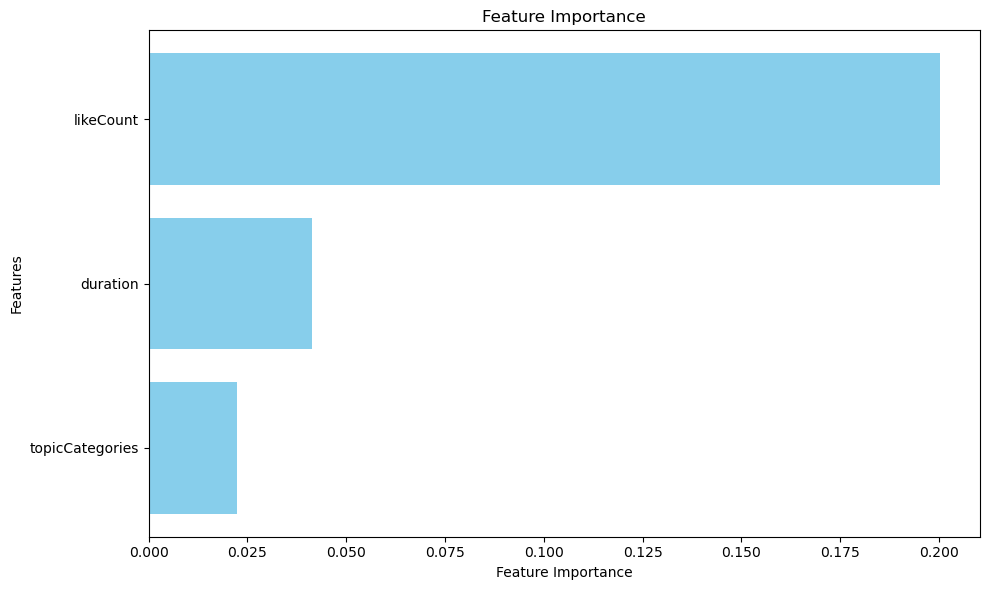

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load and preprocess data
features = ["likeCount", "duration", "definition", "topicCategories", "popularity"]
X = data[features]
y = data["viewCount"]

# Remove outliers using percentile
lower_bound = y.quantile(0.01)
upper_bound = y.quantile(0.99)
data = data[(y >= lower_bound) & (y <= upper_bound)]

X = data[features]
y = data["viewCount"]

# Handle missing values and ensure proper data types
X = X.fillna(0)
X.loc[:, "topicCategories"] = X["topicCategories"].map(X["topicCategories"].value_counts()).fillna(0).astype(int)
X.loc[:, "definition"] = (X["definition"] == "hd").astype(int)
X["popularity"] = X["popularity"].fillna("low")  # Fill missing values
X["popularity"] = (X["popularity"] == "high").astype(int)  # Convert to binary

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200,  # Chosen as a reasonable default
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)
gbr.fit(X_train, y_train)

# Extract and display feature importance
feature_importances = gbr.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)
importance_df = importance_df[importance_df['Feature'] != 'popularity']
top_features = importance_df.head(3)

print("\nFeature Importances:")
print(top_features)

# Visualization: Feature Importance
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.gca().invert_yaxis()  # Most important feature at the top
plt.tight_layout()
plt.show()


 Among the features, **likeCount** is the most influential, with an importance score of approximately 0.2004, indicating a strong correlation with viewership. **duration** has a moderate influence (0.0413), suggesting that video length contributes to predictions but is less critical than engagement metrics like likes. **topicCategories**, with the lowest importance (0.0222), plays a minimal role in the model, implying that the specific video topics have less predictive power for view counts. These insights suggest that engagement metrics such as likes are the strongest predictors, while other factors like duration and topic categories have a more limited impact.